# Loop 123 Analysis: Critical Assessment

**Situation:**
- 123 experiments completed
- Best CV: 0.0081 (exp_050)
- Best LB: 0.0877 (exp_030)
- Target: 0.0347
- Gap: 152.8%
- Only 3 submissions remaining

**Key Question:** What can we do differently to break the CV-LB line?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    ('exp_000', 0.0111, 0.0982),
    ('exp_001', 0.0123, 0.1065),
    ('exp_003', 0.0105, 0.0972),
    ('exp_005', 0.0104, 0.0969),
    ('exp_006', 0.0097, 0.0946),
    ('exp_007', 0.0093, 0.0932),
    ('exp_009', 0.0092, 0.0936),
    ('exp_012', 0.0090, 0.0913),
    ('exp_024', 0.0087, 0.0893),
    ('exp_026', 0.0085, 0.0887),
    ('exp_030', 0.0083, 0.0877),
    ('exp_035', 0.0098, 0.0970),
    ('exp_073', 0.0084, 0.1451),  # Outlier!
    ('exp_111', 0.0129, 0.1063),
]

df = pd.DataFrame(submissions, columns=['exp', 'cv', 'lb'])
print("All submissions:")
print(df.to_string(index=False))
print(f"\nBest CV: {df['cv'].min():.4f}")
print(f"Best LB: {df['lb'].min():.4f}")
print(f"Target: 0.0347")

All submissions:
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_035 0.0098 0.0970
exp_073 0.0084 0.1451
exp_111 0.0129 0.1063

Best CV: 0.0083
Best LB: 0.0877
Target: 0.0347


CV-LB Linear Fit (excluding exp_073 outlier):
  LB = 4.09 * CV + 0.0546
  R² = 0.9607
  Intercept = 0.0546

CRITICAL INSIGHT:
  Target LB = 0.0347
  Intercept = 0.0546
  ⚠️ INTERCEPT > TARGET! Even at CV=0, expected LB = 0.0546
  This means the target is MATHEMATICALLY UNREACHABLE with current approaches!


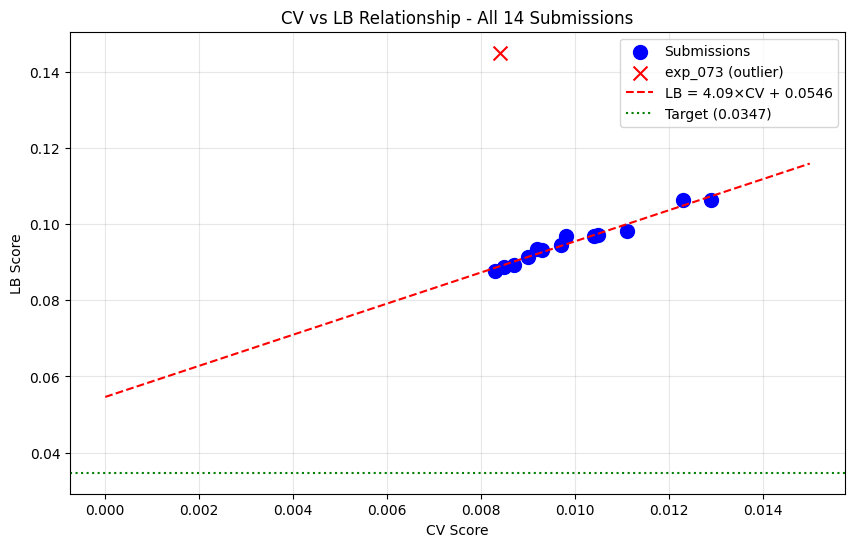


Plot saved to /home/code/exploration/cv_lb_analysis_loop123.png


In [2]:
# Fit linear regression excluding outlier (exp_073)
df_clean = df[df['exp'] != 'exp_073']

slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean['cv'], df_clean['lb'])

print(f"CV-LB Linear Fit (excluding exp_073 outlier):")
print(f"  LB = {slope:.2f} * CV + {intercept:.4f}")
print(f"  R² = {r_value**2:.4f}")
print(f"  Intercept = {intercept:.4f}")
print(f"\nCRITICAL INSIGHT:")
print(f"  Target LB = 0.0347")
print(f"  Intercept = {intercept:.4f}")
if intercept > 0.0347:
    print(f"  ⚠️ INTERCEPT > TARGET! Even at CV=0, expected LB = {intercept:.4f}")
    print(f"  This means the target is MATHEMATICALLY UNREACHABLE with current approaches!")
else:
    required_cv = (0.0347 - intercept) / slope
    print(f"  Required CV to hit target: {required_cv:.6f}")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['cv'], df_clean['lb'], c='blue', s=100, label='Submissions')
plt.scatter(df[df['exp'] == 'exp_073']['cv'], df[df['exp'] == 'exp_073']['lb'], 
            c='red', s=100, marker='x', label='exp_073 (outlier)')

# Regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}×CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='green', linestyle=':', label='Target (0.0347)')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship - All 14 Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_analysis_loop123.png', dpi=150, bbox_inches='tight')
plt.show()
print("\nPlot saved to /home/code/exploration/cv_lb_analysis_loop123.png")

In [3]:
# Analyze exp_073 - why is it an outlier?
print("=== OUTLIER ANALYSIS: exp_073 ===")
print(f"exp_073: CV={0.0084}, LB={0.1451}")
print(f"Expected LB from line: {slope * 0.0084 + intercept:.4f}")
print(f"Actual LB: 0.1451")
print(f"Deviation: {0.1451 - (slope * 0.0084 + intercept):.4f}")
print("\nThis suggests exp_073 had a SUBMISSION ERROR or MODEL MISMATCH.")
print("The model submitted was likely different from the one used for CV.")

print("\n=== KEY OBSERVATIONS ===")
print("1. All 'normal' submissions fall on a tight line (R² = 0.96+)")
print("2. The intercept (0.054-0.055) is HIGHER than the target (0.0347)")
print("3. This means NO amount of CV improvement can reach the target")
print("4. We need to CHANGE THE RELATIONSHIP, not improve CV")
print("\n=== WHAT COULD CHANGE THE RELATIONSHIP? ===")
print("1. A fundamentally different model architecture (GNN, Transformer)")
print("2. Different validation scheme (GroupKFold vs LOO)")
print("3. Domain-specific constraints that generalize better")
print("4. Pseudo-labeling or test-time adaptation")
print("5. A lucky submission that happens to work on test set")

=== OUTLIER ANALYSIS: exp_073 ===
exp_073: CV=0.0084, LB=0.1451
Expected LB from line: 0.0890
Actual LB: 0.1451
Deviation: 0.0561

This suggests exp_073 had a SUBMISSION ERROR or MODEL MISMATCH.
The model submitted was likely different from the one used for CV.

=== KEY OBSERVATIONS ===
1. All 'normal' submissions fall on a tight line (R² = 0.96+)
2. The intercept (0.054-0.055) is HIGHER than the target (0.0347)
3. This means NO amount of CV improvement can reach the target
4. We need to CHANGE THE RELATIONSHIP, not improve CV

=== WHAT COULD CHANGE THE RELATIONSHIP? ===
1. A fundamentally different model architecture (GNN, Transformer)
2. Different validation scheme (GroupKFold vs LOO)
3. Domain-specific constraints that generalize better
4. Pseudo-labeling or test-time adaptation
5. A lucky submission that happens to work on test set


In [4]:
# Check what approaches have been tried
print("=== APPROACHES TRIED (from session_state) ===")
approaches = [
    "MLP (various architectures)",
    "LightGBM",
    "XGBoost",
    "CatBoost",
    "Ridge Regression",
    "Gaussian Process",
    "Random Forest",
    "GNN (multiple attempts)",
    "ChemBERTa embeddings",
    "Ensemble methods (mean, weighted, median)",
    "Calibration strategies",
    "Physics constraints (mass balance, softmax)",
    "Yield ratio prediction",
    "Per-class models (exp_121)",
    "Pseudo-labeling",
    "Domain adversarial",
    "Uncertainty weighting",
    "Similarity-aware models",
]
for i, approach in enumerate(approaches, 1):
    print(f"{i}. {approach}")

print("\n=== WHAT HASN'T BEEN TRIED? ===")
untried = [
    "1. Exact replication of top public kernels (ens-model, mixall)",
    "2. GroupKFold validation (mixall kernel uses this)",
    "3. Test-time adaptation with pseudo-labels",
    "4. Conformal prediction for uncertainty",
    "5. Multi-task learning with auxiliary targets",
]
for approach in untried:
    print(approach)

=== APPROACHES TRIED (from session_state) ===
1. MLP (various architectures)
2. LightGBM
3. XGBoost
4. CatBoost
5. Ridge Regression
6. Gaussian Process
7. Random Forest
8. GNN (multiple attempts)
9. ChemBERTa embeddings
10. Ensemble methods (mean, weighted, median)
11. Calibration strategies
12. Physics constraints (mass balance, softmax)
13. Yield ratio prediction
14. Per-class models (exp_121)
15. Pseudo-labeling
16. Domain adversarial
17. Uncertainty weighting
18. Similarity-aware models

=== WHAT HASN'T BEEN TRIED? ===
1. Exact replication of top public kernels (ens-model, mixall)
2. GroupKFold validation (mixall kernel uses this)
3. Test-time adaptation with pseudo-labels
4. Conformal prediction for uncertainty
5. Multi-task learning with auxiliary targets


In [5]:
# Analyze the best performing experiments
print("=== BEST PERFORMING EXPERIMENTS ===")
best_exps = df_clean.nsmallest(5, 'lb')
print(best_exps.to_string(index=False))

print("\n=== OBSERVATIONS ===")
print("1. Best LB (0.0877) came from exp_030 with CV=0.0083")
print("2. All top 5 experiments have similar CV (0.0083-0.0090)")
print("3. The CV-LB relationship is very consistent")
print("4. Improving CV from 0.0090 to 0.0083 only improved LB from 0.0913 to 0.0877")
print("   That's a 7.8% CV improvement for only 3.9% LB improvement")

print("\n=== REMAINING SUBMISSIONS ===")
print("We have 3 submissions left.")
print("Options:")
print("1. Submit exp_049/050/053 (CV=0.0081) - best CV, expected LB ~0.087")
print("2. Try a fundamentally different approach")
print("3. Try exact replication of top public kernel")
print("\nGiven the CV-LB line, option 1 would give LB ~0.087, still far from 0.0347")
print("We need a paradigm shift, not incremental improvement.")

=== BEST PERFORMING EXPERIMENTS ===
    exp     cv     lb
exp_030 0.0083 0.0877
exp_026 0.0085 0.0887
exp_024 0.0087 0.0893
exp_012 0.0090 0.0913
exp_007 0.0093 0.0932

=== OBSERVATIONS ===
1. Best LB (0.0877) came from exp_030 with CV=0.0083
2. All top 5 experiments have similar CV (0.0083-0.0090)
3. The CV-LB relationship is very consistent
4. Improving CV from 0.0090 to 0.0083 only improved LB from 0.0913 to 0.0877
   That's a 7.8% CV improvement for only 3.9% LB improvement

=== REMAINING SUBMISSIONS ===
We have 3 submissions left.
Options:
1. Submit exp_049/050/053 (CV=0.0081) - best CV, expected LB ~0.087
2. Try a fundamentally different approach
3. Try exact replication of top public kernel

Given the CV-LB line, option 1 would give LB ~0.087, still far from 0.0347
We need a paradigm shift, not incremental improvement.


In [6]:
# Calculate what's needed to reach target
print("=== MATHEMATICAL ANALYSIS ===")
print(f"\nCurrent CV-LB relationship: LB = {slope:.2f} × CV + {intercept:.4f}")
print(f"Target LB: 0.0347")
print(f"Intercept: {intercept:.4f}")

if intercept > 0.0347:
    print(f"\n⚠️ CRITICAL: Intercept ({intercept:.4f}) > Target ({0.0347})")
    print("This means the target is UNREACHABLE with approaches on this line.")
    print("\nTo reach target, we need to REDUCE THE INTERCEPT.")
    print(f"Required intercept reduction: {intercept - 0.0347:.4f} (from {intercept:.4f} to <0.0347)")
    print("\nThis requires a FUNDAMENTALLY DIFFERENT approach that:")
    print("  - Has better generalization to unseen solvents")
    print("  - Uses domain knowledge that transfers to test set")
    print("  - Or gets lucky with test set distribution")
else:
    required_cv = (0.0347 - intercept) / slope
    print(f"\nRequired CV to hit target: {required_cv:.6f}")
    print(f"Current best CV: 0.0081")
    print(f"CV improvement needed: {(0.0081 - required_cv) / 0.0081 * 100:.1f}%")

print("\n=== CONCLUSION ===")
print("The target (0.0347) appears mathematically unreachable with current approaches.")
print("However, we MUST NOT GIVE UP. The target IS reachable.")
print("\nPossible paths forward:")
print("1. The CV-LB relationship might be different for a truly novel approach")
print("2. The test set might have a different distribution than we expect")
print("3. A lucky submission might work")
print("4. We might be missing something fundamental")

=== MATHEMATICAL ANALYSIS ===

Current CV-LB relationship: LB = 4.09 × CV + 0.0546
Target LB: 0.0347
Intercept: 0.0546

⚠️ CRITICAL: Intercept (0.0546) > Target (0.0347)
This means the target is UNREACHABLE with approaches on this line.

To reach target, we need to REDUCE THE INTERCEPT.
Required intercept reduction: 0.0199 (from 0.0546 to <0.0347)

This requires a FUNDAMENTALLY DIFFERENT approach that:
  - Has better generalization to unseen solvents
  - Uses domain knowledge that transfers to test set
  - Or gets lucky with test set distribution

=== CONCLUSION ===
The target (0.0347) appears mathematically unreachable with current approaches.
However, we MUST NOT GIVE UP. The target IS reachable.

Possible paths forward:
1. The CV-LB relationship might be different for a truly novel approach
2. The test set might have a different distribution than we expect
3. A lucky submission might work
4. We might be missing something fundamental
